In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
!pip install imagehash

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import imagehash
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
#from sklearn.model_selection import train_test_split
import pickle

In [5]:
root_address = '.'

In [6]:
data = pd.read_csv('/home/sourabh/Downloads/train.csv')
data.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


# Data Overview

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

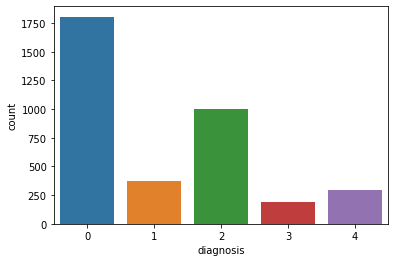

In [7]:
sns.countplot(data=data, x='diagnosis')

The values in diagnosis which indicate the category of data, are unevenly distributed. This leads to a highly biased neural network. We can merge Mild, Moderate, Proliferate_DR and Severe to one category, beside No_DR which is technicaly true: The network will predict whether there is signs of retinopathy in the patience or not. The stage of the disease is out of the context.

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

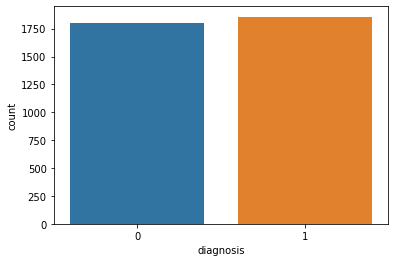

In [8]:
data2 = data.copy()

data2['diagnosis'] = data2['diagnosis'] > 0
data2['diagnosis'] = data2['diagnosis'].astype('int32')

sns.countplot(data=data2, x='diagnosis')

As it's shown above, now there is an almost evenly divided distribution.

# Data split

Now data must be splitted into train, test and val sections.

First we split data on 'train.csv' file. We will then know each filename belongs to what subdirectory.

In [9]:
import os
import sys

In [10]:
import os
import random
import pandas as pd
import numpy as np
from shutil import copyfile

data_dir = '/home/sourabh/Downloads/gaussian_filtered_images'
print(len(os.listdir(data_dir+'/DR/')))
print(len(os.listdir(data_dir+'/No_DR/')))

1
0


In [11]:
data_dir = '/home/sourabh/Downloads/gaussian_filtered_images'
classes = os.listdir(data_dir)
classes

['DR', 'No_DR']

In [12]:
source_path = [f'/content/drive/MyDrive/data/gaussian_filtered_images/{a}' for a in classes]
print(source_path)

['/content/drive/MyDrive/data/gaussian_filtered_images/DR', '/content/drive/MyDrive/data/gaussian_filtered_images/No_DR']


In [13]:
classes_dir = [f'{a}_dir' for a in classes]
classes_dir

['DR_dir', 'No_DR_dir']

In [14]:
TRAINING_PATH='/content/train'
VALIDATION_PATH='/content/val'
training_dir_path=[f'/content/train/{a}' for a in classes]
print('\n',training_dir_path)
validation_dir_path=[f'/content/val/{a}' for a in classes]
print('\n',validation_dir_path)
testing_dir_path=[f'/content/test/{a}' for a in classes]
print('\n',testing_dir_path)


 ['/content/train/DR', '/content/train/No_DR']

 ['/content/val/DR', '/content/val/No_DR']

 ['/content/test/DR', '/content/test/No_DR']


In [15]:
for train_dir_path in training_dir_path:
    try:
        os.mkdir(train_dir_path)
    except OSError:
        pass

In [16]:
for val_dir_path in validation_dir_path:
    try:
        os.mkdir(val_dir_path)
    except OSError:
        pass

In [17]:
for test_dir_path in testing_dir_path:
    try:
        os.mkdir(test_dir_path)
    except OSError:
        pass

In [18]:
from tensorflow.keras.models import load_model
#new_model = load_model('/home/sourabh/dr-cnn-model.h5')
new_model = load_model('/home/sourabh/Downloads/dr-cnn-model.h5', compile=False)


In [19]:
x = '/home/sourabh/Downloads/gaussian_filtered_images/Moderate/0a9ec1e99ce4.png'


In [20]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 222, 222, 8)  224         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    multiple             0           conv2d[0][0]                     
                                                                 conv2d_1[0][0]                   
                                                                 conv2d_2[0][0]                   
______________________________________________________________________________________________

Using TensorFlow backend.


Predicted Label:  DR


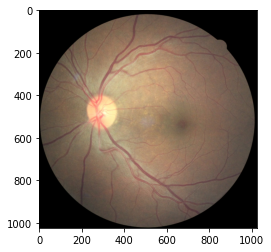

In [21]:
import tensorflow as tf
from keras.models import load_model
#from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing import image
#from keras.utils import load_img
#from tensorflow.keras.utils import load_img
#from keras_preprocessing.image import load_img
import keras.utils as image
import matplotlib.pyplot as plt
import numpy as np
import os



def load_image(img_path, show=False):

    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    return img_tensor

img_path = '/home/sourabh/Downloads/gaussian_filtered_images/DR/10003_left.jpeg'
new_image = load_image(img_path)

# img_tensor = load_img(img_path)
# new_image = tensor_to_image(img_tensor)
# def tensor_to_image(img_tensor):
#     img_tensor = img_tensor*255
#     img_tensor = np.array(img_tensor, dtype=np.uint8)
#     if np.ndim(img_tensor)>3:
#         assert img_tensor.shape[0] == 1
#         img_tensor = img_tensor[0]
     
#     return PIL.Image.fromarray(img_tensor)

img = np.asarray(Image.open('/home/sourabh/Downloads/gaussian_filtered_images/DR/10003_left.jpeg'))

plt.imshow(img)






#new_image = tf.keras.utils.load_image(img_path, target_size=(224, 224))
#new_image = tf.keras.utils.load_img('/home/sourabh/Downloads/gaussian_filtered_images/Moderate/0a9ec1e99ce4.png')
#new_image = ('/home/sourabh/Downloads/gaussian_filtered_images/Moderate/0a9ec1e99ce4.png')
pred = new_model.predict(new_image)
print('Predicted Label: ', classes[np.argmax(pred[0])])